# Tugas Kelompok 3
## Anggota :
### 1. Muhammad Ardiansyah
### 2. Muhammad Agil Arrifqi
### 3. Muhammad Rezky Hamesi
### 4. Elsa Maharani Putri
### 5. Muhammad Fazril Fahri
### 6. Muhammad Ridho Aditya Sulthan
### 7. Siti Luthfia Unigha
### 8. Fakhri Raihan Alhafiz
### 9. Wahnuzsyah Choiri Imanullah
### 10. Salwa Ayu Rafika

Sumber Code : https://github.com/greyhub/MSOLab/blob/main/PSO/pso-customize.ipynb

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Malek_Sarhani/post/What_is_Velocity_in_Particle_Swarm_Optimization/attachment/5abfe2ccb53d2f63c3c3245d/AS%3A610191980630016%401522492513881/image/PSOEquation.png")

PySwarms adalah toolkit penelitian yang dapat diperluas untuk Particle Swarm Optimization (PSO) dengan Python. Particle Swarm Optimization adalah teknik optimasi dengan cara menghitung secara terus menerus calon solusi dengan menggunakan suatu acuan kualitas. Algoritma ini mengoptimasi permasalahan dengan cara menggerakan partikel / calon solusi di dalam ruang permasalahan menggunakan fungsi tertentu untuk posisi dan kecepatan dari partikel. Pergerakan partikel dipengaruhi oleh solusi terbaik partikel tersebut, dan solusi terbaik secara umum yang didapatkan dari partikel lain. Sekumpulan partikel ini dinamakan swarm, dan pada akhirnya swarm ini akan bergerak menuju kepada solusi terbaik.

# Implementasi

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
rd.seed(12)

Masukkan library yang diperlukan, 
- random berfungsi untuk mengambil angka acak yang telah disediakan oleh python, 
- numpy berfungsi untuk mengolah data numerikal, 
- matplotlib untuk visualisasi data,
- rd.seed(12) berfungsi untuk mengambil angka acak sebanyak 12 kali.

In [3]:
W = 0.5
c1 = 0.8
c2 = 0.9

pada code di atas menjelaskan tentang inisialisasi variabel :
- w adalah berat
- c1 adalah self confidence
- c2 adalah swarm confidence

In [4]:
n_iterations = 50
n_particles = 30
target_error = 1e-6

- n_iterations adalah jumlah maksimal perulangan pergerakan partikel untuk mencapai titik yang ditentukan
- n_particles adalah jumalh dari partikel
- target_error adalah nilai minimal error

In [8]:
class Particle():
    def __init__(self):
        x = (-1) ** bool(rd.getrandbits(1)) * rd.random() * 1000
        y = (-1) ** bool(rd.getrandbits(1)) * rd.random() * 1000
        self.position = np.array([x, y])
        self.pBest_position = self.position
        self.pBest_value = float('inf')
        self.velocity = np.array([0,0])

    def update(self):
        self.position = self.position + self.velocity

Baris kode di atas merupakan kelas yang berfungsi untuk menentukan posisi awal partikel dan posisi partikel setelah dilakukan perulangan atau iterasi. 

In [6]:
class Space():
    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gBest_value = float('inf')
        self.gBest_position = np.array([rd.random() * 50, rd.random() * 50])
            
    def fitness(self, particle):
        x = particle.position[0]
        y = particle.position[1]
        f =  x**2 + y**2 + 1
        return f
    
    def set_pBest(self):
        for particle in self.particles:
            fitness_candidate = self.fitness(particle)
            if(particle.pBest_value > fitness_candidate):
                particle.pBest_value = fitness_candidate
                particle.pBest_position = particle.position
                
    def set_gBest(self):
        for particle in self.particles:
            best_fitness_candidate = self.fitness(particle)
            if(self.gBest_value > best_fitness_candidate):
                self.gBest_value = best_fitness_candidate
                self.gBest_position = particle.position
                
    def update_particles(self):
        for particle in self.particles:
            global W
            inertial = W * particle.velocity
            self_confidence = c1 * rd.random() * (particle.pBest_position - particle.position)
            swarm_confidence = c2 * rd.random() * (self.gBest_position - particle.position)
            new_velocity = inertial + self_confidence + swarm_confidence
            particle.velocity = new_velocity
            particle.update()
            
    def show_particles(self, iteration):        
        print(iteration, 'iterations')
        print('BestPosition in this time:', self.gBest_position)
        print('BestValue in this time:', self.gBest_value)
        
        for particle in self.particles:
            plt.plot(particle.position[0], particle.position[1], 'ro')
        plt.plot(self.gBest_position[0], self.gBest_position[1], 'bo')
        plt.show()

Baris kode di atas merupakan kelas untuk menentukan jarak antar satu partikel dengan partikel terdekatnya dan titik yang ditentukan setiap perulangan.
- Untuk Def __init__ merupakan fungsi utama untuk menampung variabel dari fungsi yang lain
- Def fitness, set_pbest dan set_gbest berfungsi untuk menentukan jarak partikel terdekat dari setiap partikel yang ada
- Def update_particles berfungsi untuk menentukan posisi terbaru partikel yang telah dihitung jaraknya oleh fungsi sebelumnya
- Def show_particles berfungsi untuk mencetak posisi partikel sekarang beserta nilainya

0 iterations
BestPosition in this time: [ 32.71478056 222.16795143]
BestValue in this time: 50429.85551080791


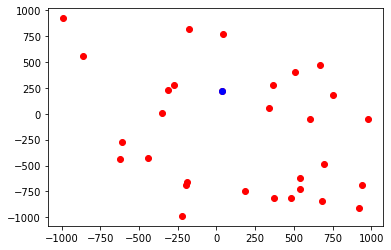

1 iterations
BestPosition in this time: [-34.9771432  -42.69141531]
BestValue in this time: 3046.9574878629082


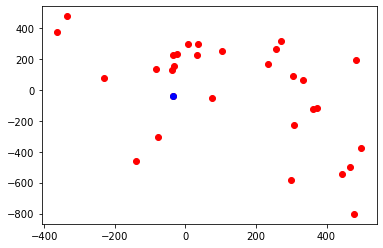

2 iterations
BestPosition in this time: [-23.26476691   3.13580298]
BestValue in this time: 552.0826398784026


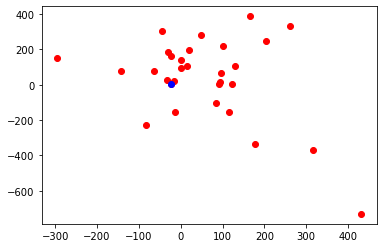

3 iterations
BestPosition in this time: [-23.26476691   3.13580298]
BestValue in this time: 552.0826398784026


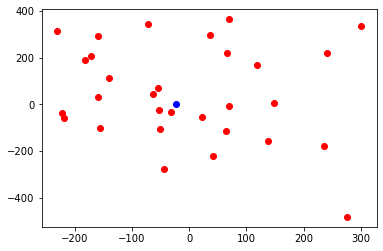

4 iterations
BestPosition in this time: [-0.71964956  4.10260389]
BestValue in this time: 18.349254165169626


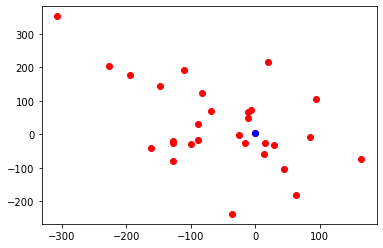

5 iterations
BestPosition in this time: [-0.71964956  4.10260389]
BestValue in this time: 18.349254165169626


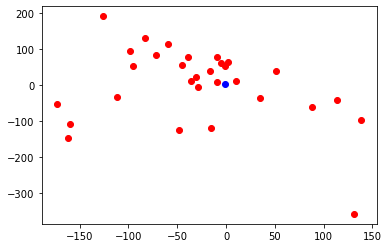

6 iterations
BestPosition in this time: [ 3.0457236  -1.95943248]
BestValue in this time: 14.115807909803223


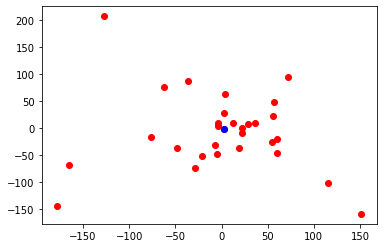

7 iterations
BestPosition in this time: [ 3.0457236  -1.95943248]
BestValue in this time: 14.115807909803223


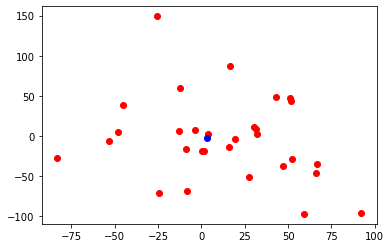

8 iterations
BestPosition in this time: [ 3.0457236  -1.95943248]
BestValue in this time: 14.115807909803223


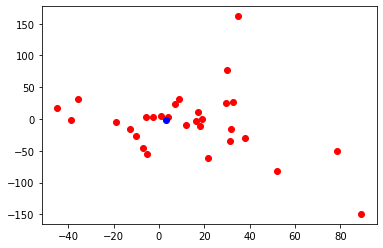

9 iterations
BestPosition in this time: [-1.2912905  -0.42166229]
BestValue in this time: 2.845230247586313


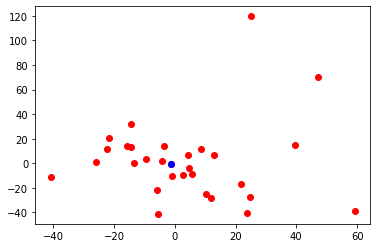

10 iterations
BestPosition in this time: [0.0357192  1.11538766]
BestValue in this time: 2.245365497294103


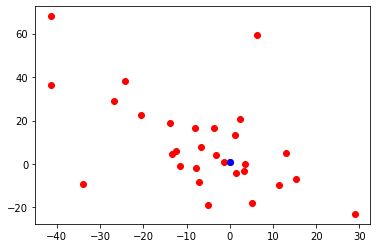

11 iterations
BestPosition in this time: [-0.42464535 -0.06942589]
BestValue in this time: 1.185143629691053


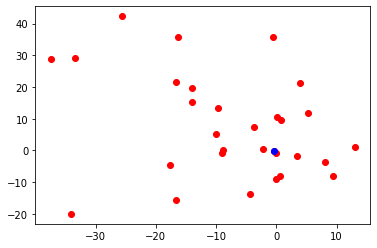

12 iterations
BestPosition in this time: [-0.03691606 -0.2705884 ]
BestValue in this time: 1.0745808799683367


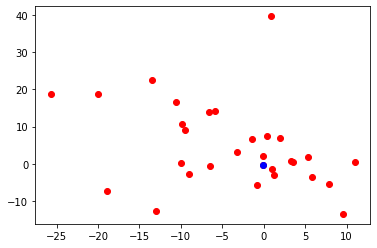

13 iterations
BestPosition in this time: [-0.03691606 -0.2705884 ]
BestValue in this time: 1.0745808799683367


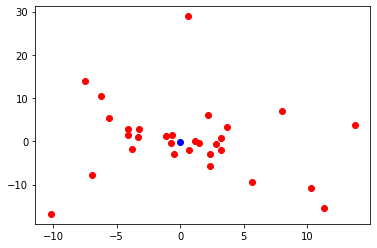

14 iterations
BestPosition in this time: [-0.03691606 -0.2705884 ]
BestValue in this time: 1.0745808799683367


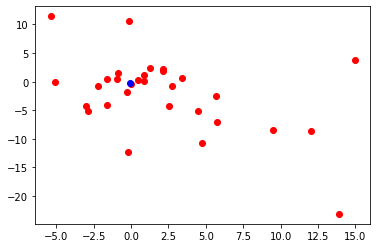

15 iterations
BestPosition in this time: [ 0.00089899 -0.25767017]
BestValue in this time: 1.066394724501171


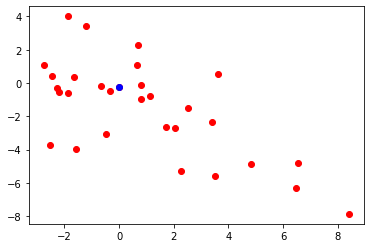

16 iterations
BestPosition in this time: [-0.10759353  0.02018987]
BestValue in this time: 1.0119839977701812


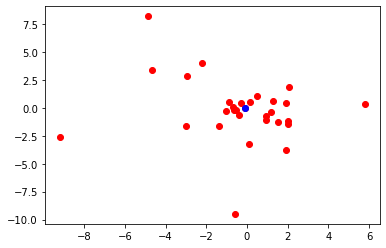

17 iterations
BestPosition in this time: [ 0.05074128 -0.06414674]
BestValue in this time: 1.0066894818454541


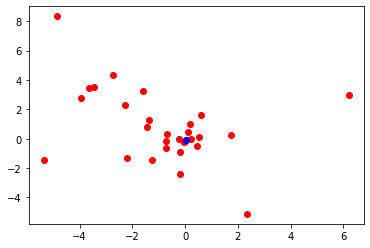

18 iterations
BestPosition in this time: [ 0.05074128 -0.06414674]
BestValue in this time: 1.0066894818454541


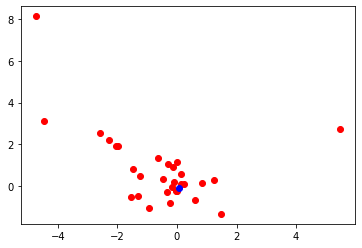

19 iterations
BestPosition in this time: [ 0.05074128 -0.06414674]
BestValue in this time: 1.0066894818454541


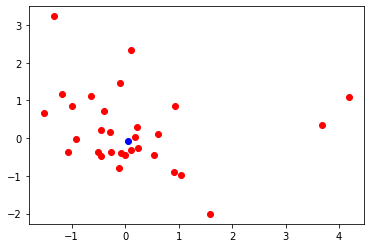

20 iterations
BestPosition in this time: [-0.05144004  0.02930073]
BestValue in this time: 1.0035046106845755


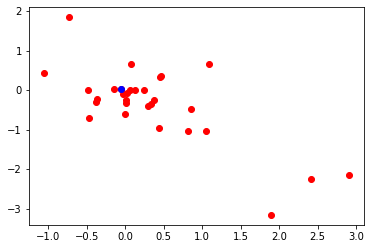

21 iterations
BestPosition in this time: [-0.01302367 -0.01578655]
BestValue in this time: 1.0004188310303332


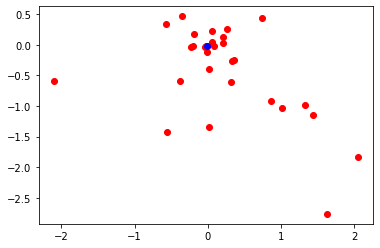

22 iterations
BestPosition in this time: [-0.00167438 -0.00623659]
BestValue in this time: 1.000041698545773


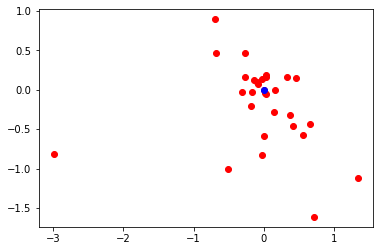

23 iterations
BestPosition in this time: [-0.00167438 -0.00623659]
BestValue in this time: 1.000041698545773


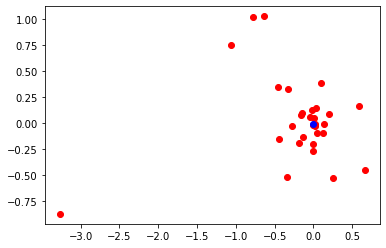

24 iterations
BestPosition in this time: [-0.00167438 -0.00623659]
BestValue in this time: 1.000041698545773


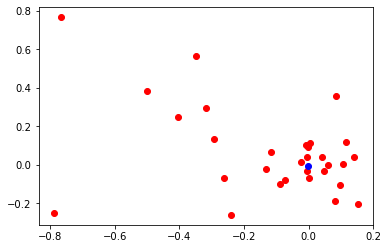

25 iterations
BestPosition in this time: [-0.00167438 -0.00623659]
BestValue in this time: 1.000041698545773


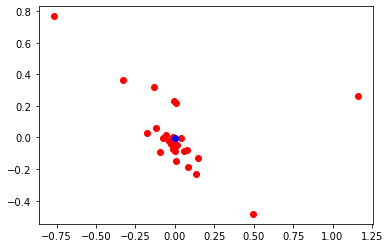

26 iterations
BestPosition in this time: [-0.00062027 -0.00422878]
BestValue in this time: 1.0000182673364693


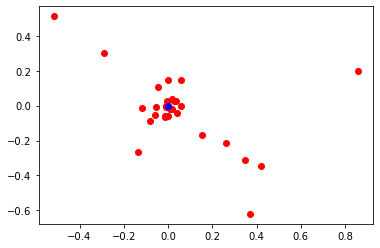

27 iterations
BestPosition in this time: [-0.00062027 -0.00422878]
BestValue in this time: 1.0000182673364693


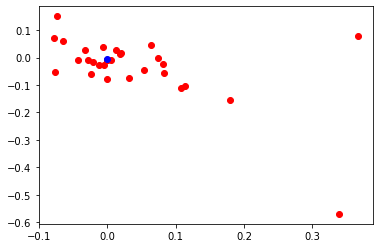

28 iterations
BestPosition in this time: [0.00087494 0.00317596]
BestValue in this time: 1.0000108522745867


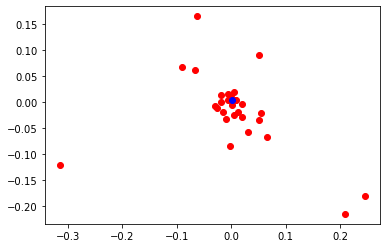

29 iterations
BestPosition in this time: [-0.002406   -0.00174076]
BestValue in this time: 1.0000088190643965


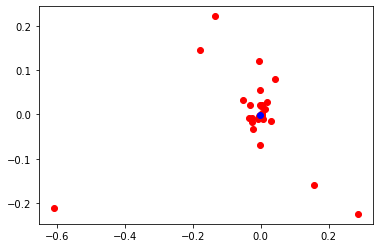

30 iterations
BestPosition in this time: [-0.002406   -0.00174076]
BestValue in this time: 1.0000088190643965


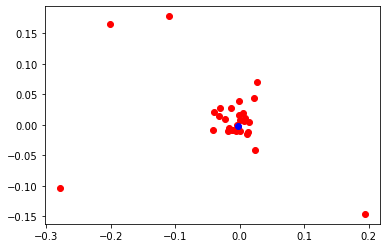

31 iterations
BestPosition in this time: [-0.00086006 -0.00127807]
BestValue in this time: 1.0000023731497036


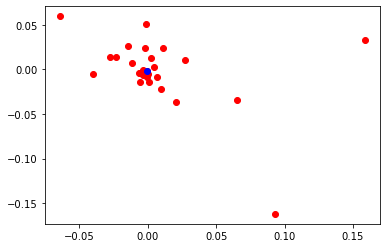

32 iterations
BestPosition in this time: [-0.00096646  0.00043197]
BestValue in this time: 1.0000011206416812


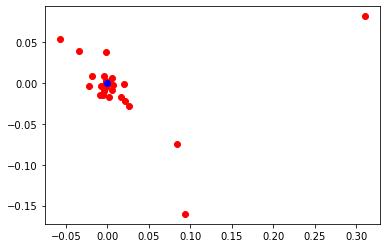

33 iterations
BestPosition in this time: [-0.00096646  0.00043197]
BestValue in this time: 1.0000011206416812


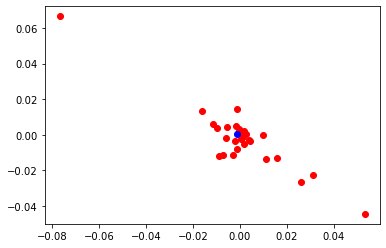

34 iterations
BestPosition in this time: [-0.00043768  0.00018029]
BestValue in this time: 1.0000002240717005


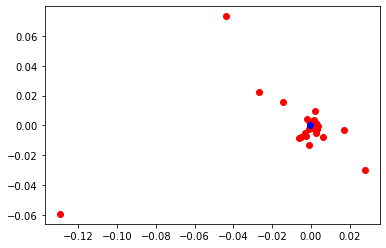

The best solution is:  [-0.00043768  0.00018029]  in  34  iterations


In [7]:
search_space = Space(1, target_error, n_particles)
particle_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particle_vector

iteration = 0
while(iteration < n_iterations):
    # set particle best & global best
    search_space.set_pBest()
    search_space.set_gBest()

    # visualization
    search_space.show_particles(iteration)
    
    # check conditional
    if(abs(search_space.gBest_value - search_space.target) <= search_space.target_error):
        break
        
    search_space.update_particles()
    iteration += 1
    
print("The best solution is: ", search_space.gBest_position, " in ", iteration, " iterations")

Baris kode di atas merupakan baris kode yang berfungsi untuk mengeksekusi semua kelas dan fungsi yang telah dibuat di atas dan juga perulangan pergerakan partikel untuk mencapai titik yang ditentukan juga dieksekusi di bagian ini. 